## 2. Conditional density estimation for the Banana distribution

In this notebook, we will show how to perform conditional density estimation. For a state variable $\mathsf{X} \sim \pi_{\mathsf{X}} \in \mathbb{R}^{N_x}$ and an observation variable $\mathsf{Y} \sim \pi_{\mathsf{Y}} \in \mathbb{R}^{N_y}$, we are interested in the characterization of the posterior density $\pi_{\mathsf{X}| \mathsf{Y}}(\boldsymbol{x} | \boldsymbol{y}^\star)$, where $\boldsymbol{y}^\star$ is the realization of the observation $\mathsf{Y}$. In particular, we would like to sample from the posterior density $\pi_{\mathsf{X} | \mathsf{Y}} (\boldsymbol{x} | \boldsymbol{y}^\star)$ given $N_e$ samples $\{ \boldsymbol{x}^1, \ldots, \boldsymbol{x}^{N_e} \}$ from the prior density $\pi_{\mathsf{X}}$.

Let $\boldsymbol{S} \colon \mathbb{R}^{N_y+N_x} \xrightarrow{} \mathbb{R}^{N_y+N_x}$ be the KR rearrangement that pushes forward the joint density $\pi_{\mathsf{X}, \mathsf{Y}}$ (target density) to the standard normal density $\mathcal{N}(\boldsymbol{0}_{N_y+N_x}, \boldsymbol{I}_{N_y+N_x})$ (reference density). From its lower triangular structure, $\boldsymbol{S}$ can be decomposed as follows:

\begin{equation}
\label{eqn:split}
\boldsymbol{S}(\boldsymbol{y}, \boldsymbol{x})=\left[\begin{array}{c}
\begin{aligned}
& \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}) \\
& \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x})
\end{aligned}
\end{array}\right],
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{Y}}} \colon \mathbb{R}^{N_y} \xrightarrow{} \mathbb{R}^{N_y}$ and $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}} \colon \mathbb{R}^{N_y+N_x} \xrightarrow{} \mathbb{R}^{N_x}$. For a sample $(\boldsymbol{y}, \boldsymbol{x})$ from the joint density, $\boldsymbol{a} = \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}, \boldsymbol{x})$ is a sample from $\mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$, as $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\mathsf{Y}, \mathsf{X}) \sim \mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$.

For a realization $\boldsymbol{y}^\star \in \mathbb{R}^{N_y}$ of the observation variable, instead of $\boldsymbol{y}$, we update our prior estimate $\boldsymbol{x}$ into $\boldsymbol{x}_a$ such that  $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{a}$. Therefore, the analysis step looks for $\boldsymbol{x}_a \in \mathbb{R}^{N_x}$ such that:
\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}).
\end{equation}

The map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushes forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y}}(\cdot | \boldsymbol{y}^\star)$ to the standard normal density $\mathcal{N}(\boldsymbol{0}_{N_x}, \boldsymbol{I}_{N_x})$, so $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is a bijection of $\mathbb{R}^{N_x}$ and there exists a unique solution to the vector-valued nonlinear equation above, denoted $\boldsymbol{x}_a$. This solution is exactly the posterior update of the prior estimate $\boldsymbol{x}$ given the realization $\boldsymbol{y}^\star$ of the observation variable. We arrive at the definition of the prior-to-posterior transformation $\boldsymbol{T} \colon \mathbb{R}^{N_y} \times \mathbb{R}^{N_x} \xrightarrow{} \mathbb{R}^{N_x}$:
\begin{equation}
\label{eqn:tmapdef}
    \boldsymbol{T}(\boldsymbol{y}, \boldsymbol{x}) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}\circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}),
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}$ 
denotes the inverse of the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ that comes from setting the first $N_y$ entries of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to $\boldsymbol{y}^\star$.

References: 

[1] Spantini, A., Baptista, R. and Marzouk, Y., 2019. Coupling techniques for nonlinear ensemble filtering. arXiv preprint arXiv:1907.00389.

[2] Marzouk, Y., Moselhy, T., Parno, M. and Spantini, A., 2016. Sampling via measure transport: An introduction. Handbook of uncertainty quantification, pp.1-41.

[3] Le Provost, M., Baptista, R., Marzouk, Y. and Eldredge, J., 2021. A low-rank nonlinear ensemble filter for vortex models of aerodynamic flows. In AIAA Scitech 2021 Forum (p. 1937).

In [1]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions
using SpecialFunctions

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116


Load some packages to make nice figures

In [2]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

### Problem setup

We generate $N_e$ samples from $\mathsf{Y} = \mathsf{X}^2 + \mathcal{E}$ for $\mathsf{X} \sim \mathcal{N}(0, 0.5^2)$ and $\mathcal{E} \sim \mathcal{N}(0, 0.1^2)$.

In [52]:
Ne = 1000# Number of samples
Nx = 1 # Dimension of the state
Ny = 1 # Dimension of the observation

πx = Normal(0, 0.5)
πϵ = Normal(0, 0.1)

X = zeros(Ny+Nx, Ne)

for i=1:Ne
    xi = rand(πx)
    ϵi = rand(πϵ)
    X[1,i] = xi^2 + ϵi
    X[2,i] = xi
end

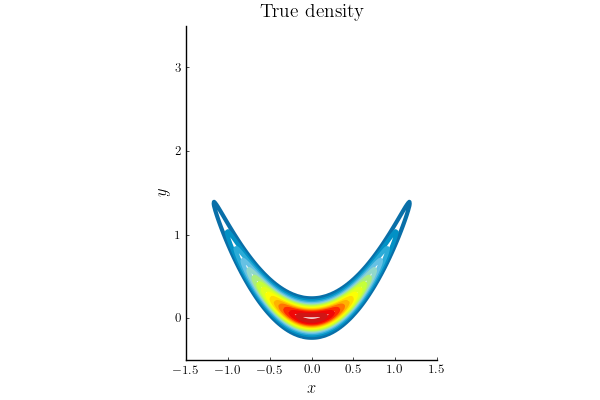

In [53]:
Nlog = 200
logbanana = zeros(Nlog, Nlog)

xrange = range(-1.5; stop = 1.5, length = Nlog)
yrange = range(-0.5; stop = 3.5, length = Nlog)

for (i,xi) in enumerate(xrange)
    for (j,yj) in enumerate(yrange)
        logbanana[i,j] = logpdf(πϵ, yj-xi^2) + logpdf(πx, xi)
    end
end


contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         linewidth = 3, xlabel = L"x", ylabel = L"y")

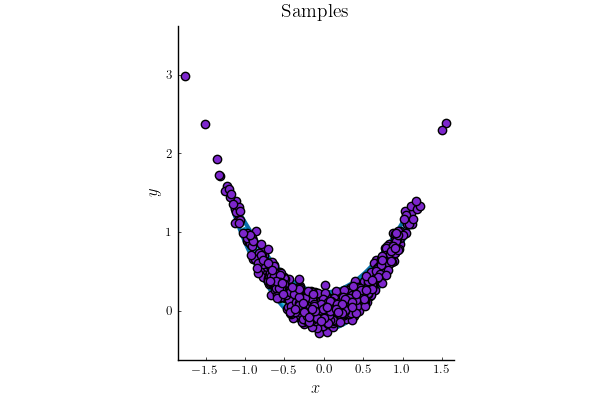

In [54]:
contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         linewidth = 3)
scatter!(X[2,:], X[1,:], ratio = 1, linewidth = 3,
       legend = false, color = :purple3, markersize = 6, xlabel = L"x", ylabel = L"y", title = "Samples")

We define an object of  `HermiteMap` `S` to hold the Knothe-Rosenblatt rearrangement that pushes forward $\pi$ to the reference density, i.e. the standard Gaussian distribution $\rho$.
The default constructor for an `HermiteMap` requires, where $m$ is the maximal order of the Hermite polynomials considered in the expansion, $N_x$ the dimension of the state, $L$ a linear transformation that rescale the samples to get zero mean and unitary standard deviation component-wise, and $C$ an array of $N_x$ `MapComponent`.

In [55]:
m = 100
S = HermiteMap(m, X; diag = true, α = 1.0e-6, factor = 0.8);

The next step is to use the greedy algorithm developed by Baptista et al. (2020) to construct a sparse expansion of the different components of the map $S$. Depending on the accuracy of the amp required. Several options are possible for the optimization: 
* `kfold` uses a k-fold cross validation procedure (the more robust choice)
* `split` splits the set of samples into a training and a testing
* An `Int64` to determine the maximum number of features for each component $s^k$ of the map $S$
* `nothing` to simply optimize the existing coefficients in the basis expansion

We only need to optimize the components of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to perform conditional sampling. Thus, we set the optional argument `start` to $N_y+1$ (2 in this problem) 

In [56]:
S = optimize(S, X, "kfold"; withqr = true, verbose = true, start = 2, hessprecond = true)

1 terms - Training error: 1.2406719681338545, Validation error: 1.230404793487948
1 terms - Training error: 1.2406385876369581, Validation error: 1.2305722568361206
2 terms - Training error: 1.2402570243921263, Validation error: 1.231476941105339
3 terms - Training error: 1.2394376485016747, Validation error: 1.2335093637180565
4 terms - Training error: 1.2379681937417868, Validation error: 1.2246898177563845
5 terms - Training error: 1.2077620970023901, Validation error: 1.1822718334714226
6 terms - Training error: 1.207529933479763, Validation error: 1.183085606004904
7 terms - Training error: 1.2008897252015904, Validation error: 1.1680256944985707
8 terms - Training error: 1.198729724407337, Validation error: 1.183072930733248
9 terms - Training error: 1.184307923486058, Validation error: 1.1749884548109366
10 terms - Training error: 1.1748986119168636, Validation error: 1.1840474939523837
11 terms - Training error: 1.1739168289899038, Validation error: 1.202056444511461
12 terms -

8 terms - Training error: 1.1936370630911148, Validation error: 1.152249352040934
9 terms - Training error: 1.191033019007318, Validation error: 1.1507924624682946
10 terms - Training error: 1.185769368276931, Validation error: 1.1472713488329846
11 terms - Training error: 1.184201791782759, Validation error: 1.1412660360705191
12 terms - Training error: 1.1770461762630549, Validation error: 1.1428676422722805
13 terms - Training error: 1.1755211393571994, Validation error: 1.1447687199007397
14 terms - Training error: 1.1745858852066982, Validation error: 1.142508219968105
15 terms - Training error: 1.1734206444173971, Validation error: 1.1474011197207177
16 terms - Training error: 1.1647624203227556, Validation error: 1.1589929090628694
17 terms - Training error: 1.1538181165128385, Validation error: 1.1527857455407458
18 terms - Training error: 1.1501951227411975, Validation error: 1.1407575739768496
19 terms - Training error: 1.1498978670167075, Validation error: 1.1388859919297354

HermiteMap(100, 2, LinearTransform(2, [0.25395134149546456, -0.022475563041196495], [0.44506615490266777 0.0; 0.0 0.6270375475406337], true), MapComponent[Map component of dimension 1 with Nψ 1 active features
, Map component of dimension 2 with Nψ 33 active features
])

Similarly, we can choose to plot only the optimized components of the map with the argument `start`

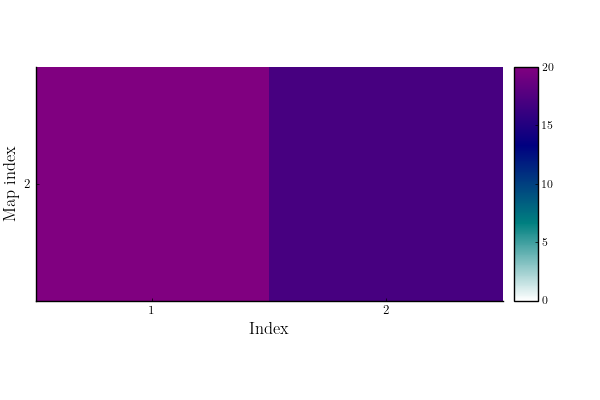

In [57]:
plot(S; start = 2)

Or, display the entire map components

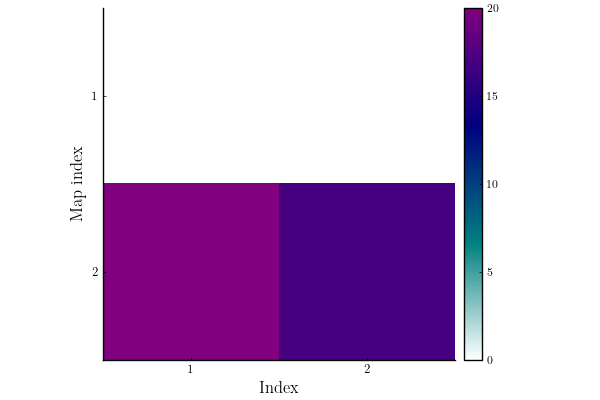

In [58]:
plot(S)

Let's evaluate $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ for the different joint samples with the function `evaluate`. We can solely evaluate the $N_y+1:Ny+N_x$ components of the map, with the argument `start`.

In [59]:
F = evaluate(S, X; start = 2)

2×1000 Array{Float64,2}:
 0.0        0.0        0.0      0.0       …   0.0        0.0       0.0
 0.236005  -0.438661  -2.20326  0.209252     -0.0936864  0.19034  -0.476208

Let's generate the posterior samples by partially inverting the map $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$, for $\boldsymbol{y}^\star = 0.25$

In [60]:
ystar = 0.25
Ystar = ystar*ones(1, Ne);

In [61]:
Xa = deepcopy(X)

2×1000 Array{Float64,2}:
  1.58733   0.713271   1.29823  …   0.30353   0.0467302   0.0209684
 -1.23259  -0.759531  -1.13119     -0.407207  0.0362098  -0.144806

In [62]:
inverse!(Xa, F, S, Ystar; apply_rescaling = true, start = 2)

LoadError: [91mUndefVarError: fa not defined[39m

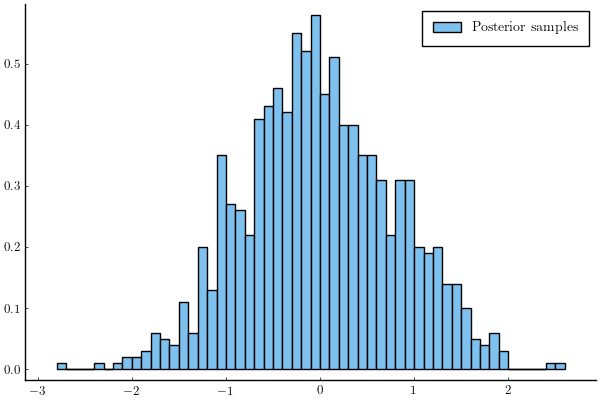

In [63]:
histogram(sort(Xa[2,:]), bins = 90, normalize = :pdf, label = "Posterior samples", color = "skyblue2")

From Bayes theorem: 
\begin{equation}
\pi_{\mathsf{X} | \mathsf{Y}} = \frac{\pi_{\mathsf{Y}| \mathsf{X}} \pi_{\mathsf{X}}}{\pi_{\mathsf{Y}}},  
\end{equation}

with $\pi_{\mathsf{Y}}(\boldsymbol{y}) = \int_{\mathsf{X}} \pi_{\mathsf{Y} | \mathsf{X}}(\boldsymbol{y} | \boldsymbol{x}) \pi_{\mathsf{X}}(\boldsymbol{x})\mathrm{d}\boldsymbol{x}$

We can compute $\pi_{\mathsf{Y}}(\boldsymbol{x})$ by numerical integration using QuadGK.jl

In [40]:
using QuadGK

In [41]:
πy(y) = quadgk(x->pdf(πϵ,y-x^2)*pdf(πx, x), -Inf, Inf)[1]

πy (generic function with 1 method)

In [42]:
# Verify that the integral equates to 1
quadgk(yi->πy(yi), -Inf, Inf)

(0.9993526959160327, 1.4620587829731692e-8)

In [43]:
πpost(y,x) = (pdf(πϵ,y-x^2)*pdf(πx, x))/πy(y)

πpost (generic function with 1 method)

In [44]:
# Verify that the integral equates to 1
quadgk(xi->πpost(ystar, xi), -Inf, Inf)

(1.0000000000000002, 1.1471260286934834e-8)

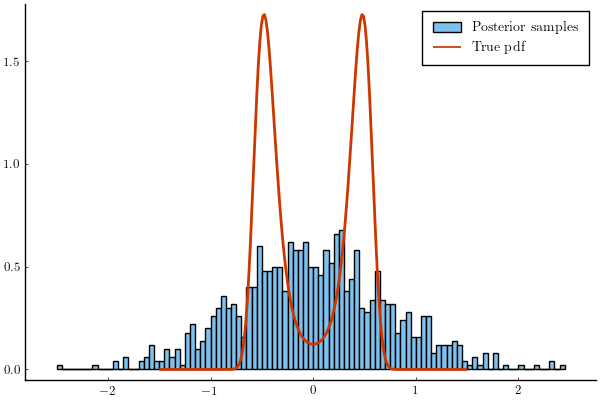

In [45]:
histogram(sort(Xa[2,:]), bins = 90, normalize = :pdf, label = "Posterior samples", color = "skyblue2")
plot!(xrange, map(xi->πpost(ystar, xi), xrange), linewidth = 2, color = "orangered3", label = "True pdf")

We can also compute the approximate posterior density from the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$. Indeed, $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushed forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y} = \boldsymbol{y}^\star}$ to the standard normal distribution, or equivalently pulls back the standard normal distribution to the posterior density. The pullback of the reference density by the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is defined as: 

\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}, \sharp}(\boldsymbol{\xi}) = \rho \circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi}) |\det \nabla \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})|,
\end{equation}

where $\rho$ is the standard Gaussian distribution of $\mathbb{R}^{N_x}$.

In this example, the joint samples are first whitened before to estimate the map $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$. Therefore, we need to rescale the samples `Xplot` before to evaluate the log-pdf of the approximate density.

In [46]:
Xplot = zeros(2, length(xrange))
# Fill the first line of `Xplot` with the realization of the observation variable $\boldsymbol{y}^\star$.
fill!(view(Xplot,1,:), ystar)
# Fill the second line of `Xplot` with the range of x values
Xplot[2,:] .= collect(xrange);
# Rescale the samples
transform!(S.L, Xplot)
# Compute the log-pdf of the pullback, and account for the affine rescaling
logpdfpost_approx = log_pdf(S[2], Xplot) .+ log(1/(S.L.L.diag[2]));
itransform!(S.L, Xplot)
# Lift the samples to the original space.

2×200 Array{Float64,2}:
  0.25   0.25      0.25      0.25     …  0.25     0.25     0.25     0.25
 -1.5   -1.48492  -1.46985  -1.45477     1.45477  1.46985  1.48492  1.5

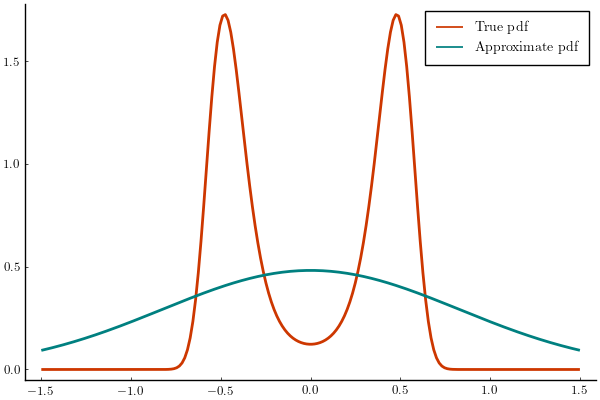

In [47]:
plot(xrange, map(xi->πpost(ystar, xi), xrange), linewidth = 2, color = "orangered3", label = "True pdf")
plot!(xrange, exp.(logpdfpost_approx), linewidth = 2, color = "teal", label = "Approximate pdf")

In 1D, we can go further and compare the components of the true Knothe-Rosenblatt rearrangement with the estimated one. 
Let $\Phi_{\pi}$,  $\Phi_{\rho}$ be the cumulative distribution function (CDF) of the target density $\pi$, the standard normal distribution of $\mathbb{R}$, respectively. 

For any distribution $\pi$ defined on $\mathbb{R}$,  $\Phi_{\pi}$ pushes forward the distribution $\pi$ to  $\mathcal{U}([0,1])$ the uniform distribution on $[0,1]$.

For the standard normal distribution, the inverse of the CDF is given by $\Phi_{\rho}^{-1}(z) = \sqrt{2} \; \text{erfinv}(2z-1)$, with $\text{erfinv}$ the inverse of the $\text{erf}$ function. 

Therefore the Knothe-Rosenblatt rearrangement that pushes forward the univariate distribution $\pi$ to the standard normal distribution is given by $\Phi_{\rho}^{-1} \circ \Phi_{\pi}$.

In our case, we are interested in $\boldsymbol{x} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x})$, namely the Knothe-Rosenblatt rearrangement that pushes forward the posterior distribution $\pi_{\mathsf{X} | \mathsf{Y} = \boldsymbol{y}^\star}$ to the standard normal distribution.

In [48]:
Φπpost(y,x) = quadgk(z->πpost(y,z), -Inf, x)[1]

Φπpost (generic function with 1 method)

In [49]:
SX(y, x) = √2*erfinv(2*clamp(Φπpost(ystar, x),0.0,1.0)-1)

SX (generic function with 1 method)

In [50]:
Xrange = zeros(2, length(xrange))
fill!(view(Xrange,1,:), ystar)
Xrange[2,:] .= collect(xrange)

SpushX = evaluate(S, Xrange)[2,:];

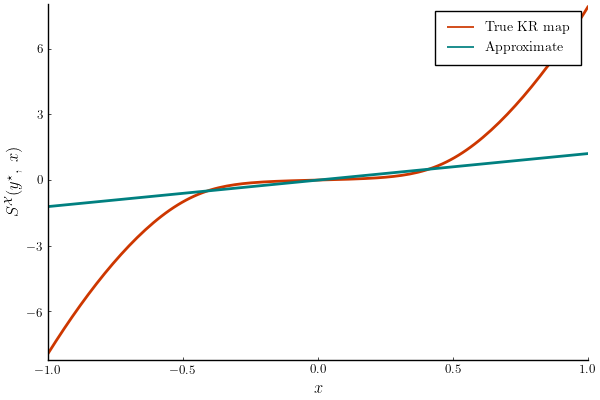

In [51]:
plt = plot(xlabel = L"x", ylabel = L"S^{\mathcal{X}}(y^\star, \; x)", xlim = (-1.0, 1.0), ylim = (-Inf, Inf))

plot!(plt, xrange, map(xi-> SX(ystar, xi), xrange), linewidth = 2, color = "orangered3", label = "True KR map")
plot!(plt, xrange, SpushX, linewidth = 2, color = "teal", label = "Approximate")